
-------------------------------------
step 1 blue 

-2 , -1  (T<>: dx,dy)  -1 , -3
+1 , +3  (T<>: dx,dy)  +2 , +1
+3 , -2  (T<>: dx,dy)  +4 , -4

-------------------------------------
step 2 green 

-1 , -3  (D...)  -2 , -6
+2 , +1  (D...)  +4 , +2
+4 , -4  (D...)  +8 , -8

-------------------------------------
step 3 black 

-2 , -6  (Fyx  : y,x)  -6 , -2
+4 , +2  (Fyx  : y,x)  +2 , +4
+8 , -8  (Fyx  : y,x)  -8 , +8

-------------------------------------
step 4 orange 

-6 , -2  (R90CC:-y,x)  +2 , -6
+2 , +4  (R90CC:-y,x)  -4 , +2
-8 , +8  (R90CC:-y,x)  -8 , -8


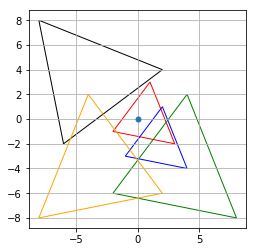

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = ['red','blue','green','black','orange','purple']
color_n = -1
step = 1

def next_color():
    global color_n
    color_n += 1
    color_n %= len(colors)
    return colors[color_n]

def draw(triangle):
    shape = plt.Polygon(triangle, fill=None, edgecolor=next_color())
    plt.gca().add_patch(shape)

def print_table(old_triangle, new_triangle, description):
    global step
    global color_n
    print('\n-------------------------------------')
    print('step',step,colors[color_n],'\n')
    step += 1
    for xy_o, xy_n in zip(old_triangle, new_triangle):
        print(format(xy_o), description, format(xy_n))

def format(xy):
    return '{:+2d}'.format(xy[0]) + ' , ' + '{:+2d}'.format(xy[1])
     
def R90CC(triangle):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([-y, x]) 
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (R90CC:-y,x) ')
    return new_triangle

def R90CW(triangle):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([y,-x]) 
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (R90CW:y,-x) ')
    return new_triangle

def Fx(triangle):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([x, -y]) 
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (Fx   : x,-y) ')
    return new_triangle

def Fy(triangle):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([-x, y])
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (Fy   : -x,y) ')
    return new_triangle

def Fyx(triangle):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([y, x])
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (Fyx  : y,x) ')
    return new_triangle

def T(triangle, v):
    new_triangle = []
    for x, y in triangle:
        new_triangle.append([x+v[0], y+v[1]])
    draw(new_triangle)
    print_table(triangle, new_triangle, ' (T<>: dx,dy) ')
    return new_triangle

def D(triangle, factor, origin=[0,0]):
    new_triangle = []
    for x,y in triangle:
        fx = origin[0] + factor * (x - origin[0])
        fy = origin[1] + factor * (y - origin[1])
        new_triangle.append([origin[0]+fx, origin[1]+fy])
    draw(new_triangle)
    plt.plot(origin[0], origin[1], marker='o', markersize=5)
    print_table(triangle, new_triangle, ' (D...) ')
    return new_triangle 

triangle = [[-2, -1], [1, 3], [3, -2]]

draw(triangle)
R90CC(Fyx(D(T(triangle,[1,-2]),2)))
plt.axis('scaled')
plt.grid()
plt.show()